##Projet de détection de fraude par carte de crédit


In [1]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0,1))
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, mean_squared_error

In [2]:
v1 = np.array([[1,3], [2,2]])
v2 = np.array([[2,1], [3,1]])

In [3]:
v1

array([[1, 3],
       [2, 2]])

In [4]:
v2

array([[2, 1],
       [3, 1]])

In [5]:
w = v1 - v2

In [6]:
w

array([[-1,  2],
       [-1,  1]])

In [7]:
w = v1 + v2
w

array([[3, 4],
       [5, 3]])

In [8]:
v1 * v2

array([[2, 3],
       [6, 2]])

In [9]:
np.dot(v1, v2)

array([[11,  4],
       [10,  4]])

In [12]:
# Load the csv file

dataframe  = pd.read_csv('creditcarddata.csv')
dataframe

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,0,44,1,2,1,7995391,2109,0.0000,1,0,3,11329257,1,0
2262,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2263,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2264,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0


### Perform Exploratory Data Analysis

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2266 non-null   int64  
 1   Age                      2266 non-null   int64  
 2   HouseTypeID              2266 non-null   int64  
 3   ContactAvaliabilityID    2266 non-null   int64  
 4   HomeCountry              2266 non-null   int64  
 5   AccountNo                2266 non-null   int64  
 6   CardExpiryDate           2266 non-null   int64  
 7   TransactionAmount        2266 non-null   float64
 8   TransactionCountry       2266 non-null   int64  
 9   LargePurchase            2266 non-null   int64  
 10  ProductID                2266 non-null   int64  
 11  CIF                      2266 non-null   int64  
 12  TransactionCurrencyCode  2266 non-null   int64  
 13  PotentialFraud           2266 non-null   int64  
dtypes: float64(1), int64(13)

In [15]:
# Check for null values

dataframe.isnull().values.any()

False

In [16]:
len(dataframe["Age"])

2266

In [17]:
dataframe["Age"].describe()

count    2266.000000
mean       32.703883
std        18.020767
min         2.000000
25%        17.000000
50%        33.000000
75%        50.000000
max        63.000000
Name: Age, dtype: float64

In [18]:
dataframe[dataframe.PotentialFraud == 0]

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,0,44,1,2,1,7995391,2109,0.0000,1,0,3,11329257,1,0
2262,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2263,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2264,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0


In [19]:
non_fraud = len(dataframe[dataframe.PotentialFraud == 0])
fraud = len(dataframe[dataframe.PotentialFraud == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  2013
Number of Fraud transactions:  253
Percentage of Fraud transactions: 11.1650


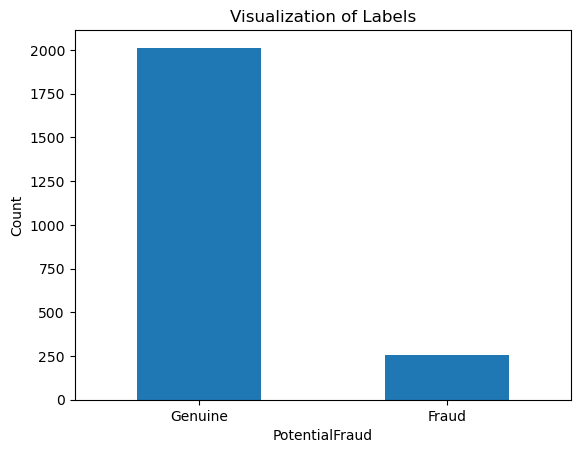

In [20]:
# Visualize the "Labels" column in our dataset
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['PotentialFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [21]:
dataframe.columns

Index(['Gender', 'Age', 'HouseTypeID', 'ContactAvaliabilityID', 'HomeCountry',
       'AccountNo', 'CardExpiryDate', 'TransactionAmount',
       'TransactionCountry', 'LargePurchase', 'ProductID', 'CIF',
       'TransactionCurrencyCode', 'PotentialFraud'],
      dtype='object')

In [22]:
dataframe["Age"]

0       56
1       56
2       56
3       56
4       56
        ..
2261    44
2262     4
2263     4
2264     4
2265     4
Name: Age, Length: 2266, dtype: int64

<Axes: >

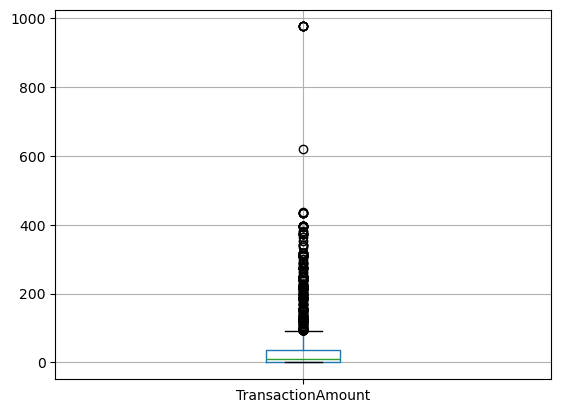

In [23]:
dataframe.boxplot(["TransactionAmount"])

In [24]:
scaler = StandardScaler()
dataframe["NormalizTransactionAmount"] = scaler.fit_transform(dataframe["TransactionAmount"].values.reshape(-1, 1))

In [25]:
dataframe

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud,NormalizTransactionAmount
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0,-0.496005
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0,-0.496005
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0,-0.496005
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0,-0.496005
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0,-0.484669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,0,44,1,2,1,7995391,2109,0.0000,1,0,3,11329257,1,0,-0.496073
2262,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0,-0.359496
2263,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0,-0.359496
2264,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0,-0.359496


<Axes: >

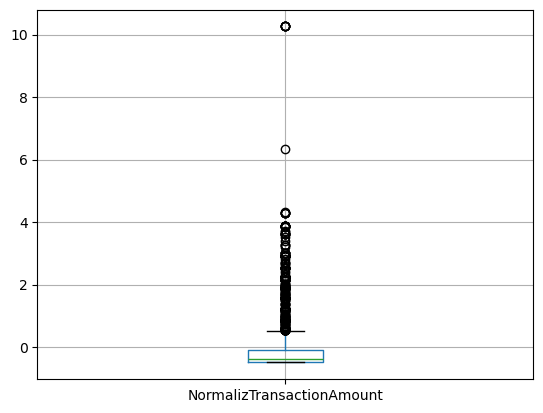

In [26]:
dataframe.boxplot("NormalizTransactionAmount")

array([[<Axes: title={'center': 'NormalizTransactionAmount'}>]],
      dtype=object)

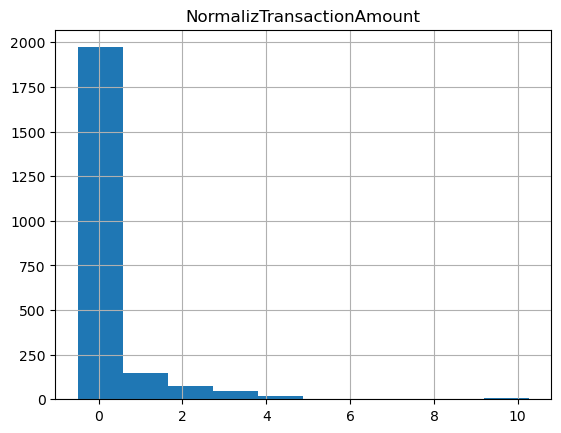

In [29]:
dataframe.hist("NormalizTransactionAmount")

In [34]:
#dataframe["NormalizTransactionAmount"]

dataframe.head()

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0


In [33]:
dataframe.drop("NormalizTransactionAmount", inplace= True, axis= 1)

KeyError: "['NormalizTransactionAmount'] not found in axis"

In [35]:
# Perform Scaling
scaler = StandardScaler()
#dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["TransactionAmount"].values.reshape(-1, 1))
#dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["PotentialFraud"]
X = dataframe.drop(["PotentialFraud"], axis= 1)

In [ ]:
dataframe

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,0,44,1,2,1,7995391,2109,0.0000,1,0,3,11329257,1,0
2262,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2263,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2264,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: PotentialFraud, dtype: int64

In [ ]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (1586, 13)
Shape of test_X:  (680, 13)


Entraînons différents modèles sur notre ensemble de données et observons quel algorithme fonctionne le mieux pour notre problème.

Appliquons les algorithmes Random Forests et Decision Trees,Logistic regrression à notre ensemble de données.

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(train_X, train_Y)
predictions_logistic = logistic.predict(test_X)
logistic__score = logistic.score(test_X, test_Y) * 100
logistic__score

88.67647058823529

In [ ]:
test_Y

188     0
809     0
1583    0
1090    0
674     0
       ..
123     1
1713    0
394     0
1027    0
1442    0
Name: PotentialFraud, Length: 680, dtype: int64

In [ ]:
len(list(predictions_logistic))

680

In [ ]:
len(list(test_Y))

680

In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
decision_tree_score

88.67647058823529

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
random_forest_score

90.73529411764706

In [ ]:
# Print scores of our classifiers

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)
print("logistic regression Score: ", logistic__score)

Random Forest Score:  90.73529411764706
Decision Tree Score:  88.67647058823529
logistic regression Score:  88.67647058823529


#Evaluation de modele en terme d'erreur

In [ ]:
error_logistic = mean_squared_error(test_Y,predictions_logistic)
error_dt = mean_squared_error(test_Y,predictions_dt)
error_rf = mean_squared_error(test_Y,predictions_rf)

In [ ]:
# Print errors of our classifiers

print("Random Forest error: ", error_rf)
print("Decision Tree error: ", error_dt)
print("logistic regression error: ", error_logistic)

Random Forest error:  0.09264705882352942
Decision Tree error:  0.11323529411764706
logistic regression error:  0.11323529411764706


In [ ]:
error_logistic

0.11323529411764706

In [ ]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [ ]:
# Plot confusion matrix for Logistic regression 

confusion_matrix_logistic = confusion_matrix(test_Y, predictions_logistic.round())
print("Confusion Matrix - Logistic regression")
print(confusion_matrix_logistic)

Confusion Matrix - Logistic regression
[[603   0]
 [ 77   0]]


Confusion matrix, without normalization


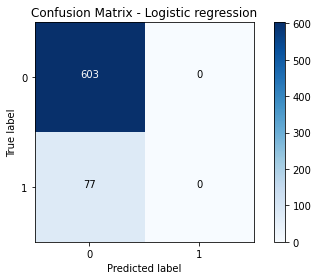

In [ ]:
plot_confusion_matrix(confusion_matrix_logistic, classes=[0, 1], title= "Confusion Matrix - Logistic regression")

In [ ]:
# Plot confusion matrix for Decision Trees

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[561  42]
 [ 35  42]]


Confusion matrix, without normalization


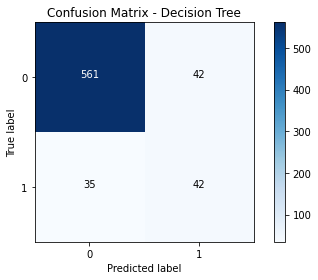

In [ ]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [ ]:
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[571  32]
 [ 31  46]]


Confusion matrix, without normalization


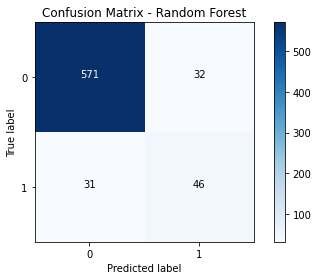

In [ ]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [ ]:
# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    

In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.88676
Precision: 0.50000
Recall: 0.54545
F1-score: 0.52174


In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.90735
Precision: 0.58974
Recall: 0.59740
F1-score: 0.59355


Clearly, Random Forest model works better than Decision Trees

Mais, si nous observons clairement que notre ensemble de données souffre d'un sérieux problème de **déséquilibre de classe**.
Les transactions authentiques (et non frauduleuses) représentent plus de 99 %, les transactions frauduleuses constituant 0,17 %.

Avec un tel type de distribution, si nous entraînons notre modèle sans prendre en compte les problèmes de déséquilibre, il prédit l'étiquette avec une plus grande importance accordée aux transactions authentiques (car il y a plus de données à leur sujet) et obtient donc plus de précision.

Le problème du déséquilibre des classes peut être résolu par diverses techniques. Le **suréchantillonnage** en fait partie.
 
Une approche pour traiter les ensembles de données déséquilibrés consiste à suréchantillonner la classe minoritaire. L'approche la plus simple consiste à dupliquer des exemples dans la classe minoritaire, bien que ces exemples n'ajoutent aucune nouvelle information au modèle.

Au lieu de cela, de nouveaux exemples peuvent être synthétisés à partir des exemples existants. Il s'agit d'un type d'augmentation des données pour la classe minoritaire et est appelé **technique de suréchantillonnage synthétique des minorités**, ou **SMOTE** en abrégé.

In [ ]:
# Performing oversampling on RF and DT

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (4026, 13)
Resampled shape of Y:  (4026,)
Counter({0: 2013, 1: 2013})


In [ ]:
# Build the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [ ]:
# Visualize the confusion matrix

cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[557  62]
 [ 22 567]]


Confusion matrix, without normalization


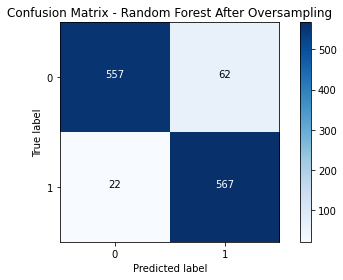

In [ ]:
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.93046
Precision: 0.90143
Recall: 0.96265
F1-score: 0.93103


Now it is evident that after addressing the class imbalance problem, our Random forest classifier with SMOTE performs far better than the Random forest classifier withour SMOTE